# ML

## Pre

### includes

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from datetime import datetime

import random

from tqdm import tqdm

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")
 
import warnings                                            
warnings.filterwarnings('ignore')

### Download data

In [ ]:
url='https://drive.google.com/file/d/1HBH9S64qfm_e2BNuCVDh_ipVaRmdufo7/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df[:100]

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,-1.00,-1,2020-08-04 04:07:56,-1,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,-1,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC
1,0,-1.00,-1,2020-08-04 01:47:40,-1,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,-1,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810
2,0,-1.00,-1,2020-08-04 16:54:31,-1,0.00,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,-1,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,-1,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696
3,0,-1.00,-1,2020-08-03 20:34:28,-1,0.00,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,-1,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6
4,0,-1.00,-1,2020-08-03 20:54:17,1064,0.00,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,-1,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,-1,-1,-1,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,-1.00,-1,2020-08-04 02:37:24,-1,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,5A273B5A3885A1B1874DFA46F0FD9E99,-1,E3DDEB04F8AFF944B11943BB57D2F620,5D255419077C120F9A244362A27FFAA7
96,0,-1.00,-1,2020-08-03 22:49:16,95,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,7F286560861764CCB93C90B7AA833949,4739C29FB9D804A0669AFB6F7D332A20,E2F9BBDA2A35A10939A86E8D37649A65,319B234EF0940A9FB5BB68DFB51F09D7,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,92A895865DD5CF2103D64590D060C334,C81067B852CA80182934598620F3E0EE C3D54B8999FB3...,E3DDEB04F8AFF944B11943BB57D2F620,EB3AB6992030F776606E9C64FCB0622A
97,1,674.15,323822,2020-08-04 04:19:52,-1,674.15,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,74A5D719AE8D7B38BA0092FBB325B727,-1,E3DDEB04F8AFF944B11943BB57D2F620,437B97E3A184509FD0F836A1FE8BF013
98,0,-1.00,-1,2020-08-04 07:56:18,2,0.00,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,-1,C45A9AC6D102ACAEEDF0D6F78636D84A,58D8900E50A4699360CF86033E5112E3,033E492229C2222EFAA16EE8A6462D8B,0F5AE38AFC0210BAE65C4C9491339B08,EB1EB6A03897A9F48C11FAA728F829F4,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,511D30F0C880FD259F80E34907B553FF,C7F1C5A5F56F92F633FBC8DEDA39C23A 76C63319C81E2...,925829CF82DFDC74DE3F88F003CE7BEF,30DC6A6ECCDE8EA362A142067FA6BF23


In [ ]:
df.head()

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,-1.0,-1,2020-08-04 04:07:56,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,-1,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC
1,0,-1.0,-1,2020-08-04 01:47:40,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,-1,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810
2,0,-1.0,-1,2020-08-04 16:54:31,-1,0.0,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,-1,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,-1,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696
3,0,-1.0,-1,2020-08-03 20:34:28,-1,0.0,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,-1,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6
4,0,-1.0,-1,2020-08-03 20:54:17,1064,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,-1,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,-1,-1,-1,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33


### Delete Sale metadata

In [ ]:
del df['SalesAmountInEuro']
del df['time_delay_for_conversion']
del df['product_price']

## Converts

### Convert -1 and '-1' to NaN

In [ ]:
df = df.replace(-1, np.NaN)
df = df.replace('-1', np.NaN)

### Convert click_timstamps to time_stamp

In [ ]:
df['click_timestamp'] = df[['click_timestamp']].apply(lambda x: datetime.strptime(x[0], "%Y-%m-%d %H:%M:%S").timestamp(), axis=1).astype(int)

### analyze

### types, mean, avg and ...

In [ ]:
df.dtypes

Sale                     int64
click_timestamp          int64
nb_clicks_1week        float64
product_age_group       object
device_type             object
audience_id             object
product_gender          object
product_brand           object
product_category(1)     object
product_category(2)     object
product_category(3)     object
product_category(4)     object
product_category(5)     object
product_category(6)     object
product_category(7)    float64
product_country         object
product_id              object
product_title           object
partner_id              object
user_id                 object
dtype: object

In [ ]:
df.describe()

,Sale,click_timestamp,nb_clicks_1week,product_category(7)
count,100000.000000,1.000000e+05,53940.000000,0.0
mean,0.136610,1.596507e+09,439.389006,NaN
std,0.343437,3.291276e+04,1541.251393,NaN
min,0.000000,1.596439e+09,0.000000,NaN
25%,0.000000,1.596484e+09,6.000000,NaN
50%,0.000000,1.596506e+09,39.000000,NaN
75%,0.000000,1.596530e+09,198.000000,NaN
max,1.000000,1.596569e+09,25390.000000,NaN


### number of diffrenet values

In [ ]:
print('number of rows', len(df))
for col in df.columns:
  print(col, 'number of diffrenet value', len(df[col].value_counts()))
  print('number of nan', df[col].isna().sum())
  # print(df[col].value_counts())
  print("---------------------------")

number of rows 100000
Sale number of diffrenet value 2
number of nan 0
---------------------------
click_timestamp number of diffrenet value 67045
number of nan 0
---------------------------
nb_clicks_1week number of diffrenet value 1137
number of nan 46060
---------------------------
product_age_group number of diffrenet value 8
number of nan 75603
---------------------------
device_type number of diffrenet value 3
number of nan 39
---------------------------
audience_id number of diffrenet value 3181
number of nan 71793
---------------------------
product_gender number of diffrenet value 10
number of nan 75554
---------------------------
product_brand number of diffrenet value 4769
number of nan 65800
---------------------------
product_category(1) number of diffrenet value 21
number of nan 45502
---------------------------
product_category(2) number of diffrenet value 144
number of nan 45517
---------------------------
product_category(3) number of diffrenet value 698
number of nan 

### Number of NaNs

In [ ]:
df.isna().sum() / len(df) * 100

Sale                     0.000
click_timestamp          0.000
nb_clicks_1week         46.060
product_age_group       75.603
device_type              0.039
audience_id             71.793
product_gender          75.554
product_brand           65.800
product_category(1)     45.502
product_category(2)     45.517
product_category(3)     52.316
product_category(4)     71.222
product_category(5)     92.009
product_category(6)     98.832
product_category(7)    100.000
product_country         23.754
product_id              23.714
product_title           45.763
partner_id               0.000
user_id                  0.000
dtype: float64

### Plots

In [ ]:
for column in df.loc[:,list(df.dtypes != 'object')]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

Error in callback <function flush_figures at 0x7fdce9860320> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
(df['nb_clicks_1week'] > 10000).sum()

89

In [ ]:
sns.heatmap(df.isna().corr(), annot=False)

KeyboardInterrupt: ignored

In [ ]:
sns.heatmap(df[['click_timestamp', 'Sale', 'nb_clicks_1week']].corr(), annot=True)

## Clean data

### too many diffrenet values

In [ ]:
del df['user_id']
del df['product_id']

### too many NaNs

In [ ]:
del df['product_age_group']
del df['product_gender']
del df['audience_id']

### fill NaN

In [ ]:
for column in df.loc[:,list(df.dtypes != 'object')]:
    df[column][df[column].isnull()] = df[column].mean()

### Remove outlires

In [ ]:
df = df.drop(df[df['nb_clicks_1week'] > 10000].index)

### Convert product category to multi columns

In [ ]:
cache = None
def transform_product():
  global cache
  if cache is not None:
    return cache.copy()
  unq = pd.unique(df[[f'product_category({i+1})' for i in range(7)]].values.ravel('K'))
  unq = unq[1:]
  new_df = pd.DataFrame()
  for u in tqdm(unq):
    new_df[u] = (
      (df['product_category(1)'] == u) |
      (df['product_category(2)'] == u) |
      (df['product_category(3)'] == u) |
      (df['product_category(4)'] == u) |
      (df['product_category(5)'] == u) |
      (df['product_category(6)'] == u) |
      (df['product_category(7)'] == u)
    )
  cache = new_df.copy()
  return new_df
transform_product()

100%|██████████| 2301/2301 [01:14<00:00, 31.03it/s]


,033E492229C2222EFAA16EE8A6462D8B,13C26D10258053889D75D9B9CA922EC7,62D6A49514020FA0B2E434DB0B506005,7F286560861764CCB93C90B7AA833949,E02400CDAD96905D88E932FE9B7D3552,9D307E5B713DE5E90D787BE9F802AFBB,B83EF4115DC165749F3FCB737CC1044D,7532B3FBAFEC164460C4ED6FEB0C022C,B4B45C6CE5FC4DE45AB02974D8849DBD,635623BABBB7DA2E072D8C339F606E15,88CED8BA3AA711A20ACF8B1FC574F218,EC997D43AC86A75D9B88A1051F86A67C,6A21F69EBA80612A04B0F6BAC857AAF2,DDC2B3CC38945E431DE1B3F59EC56680,944B2A351FEFAC79AEAA9DA57E1B351F,2134F56D3769B5022DB7172F1536B749,5D656311CF9F47E34248BE9FBFF194A0,5693606EF31931A11D5985E046ABBE75,111C91D6B0D89C84BF196FED8DBE7BBB,2551A1FA7839742971CDF4C67667E17A,69995F9BE9CA542AF2D7A3A2344C2B0A,CD599E5A946D00A81A875E085F7EF1E8,346AC0DECB71FFDC9114236B419D7814,50FF54E71F635597F839D2428054DC0C,1F7C0436C367A14B4C62294F235D45A4,BB4A179E615AD18488A859BC09B06D60,4295BE0EC68D12EDB7D771310069C493,7701F5CEE32DB638E1B6F59ED0CBD56D,41DF6386116137A19E7DBC07CE44C95A,77FFC91A6157E50A0A114135F18BB1DB,93767468F613A4E603BBD8FDE52DF7AE,A064B48EA8588E500FE1523D1A696260,C1E60A42840668783CE8F9C783D33BD5,62B29A96D2B6D708F7BAFF4582C77702,939A40D09BD05A13C32B381245670495,65838FD696D6EEF1348247F87B8A298E,FB9484497C58FBB55B560FC0E5084505,FFBD847719C42D1F80F560739885435D,49C166361658D9ACF79C78FC97272B01,5DA3309EAFC202FA6674E96D1A956E42,...,E37EBBB25BC4BC0C5DE5BB2DF41F30BE,6FCAEED64DC304B1CF36BEABCA6732FD,8E667FC4D92DCDD0FCC294D1931C87BD,8D3B555805A8F6EAB74196D6A16A703C,2A20295B81846BCF78AAAFFAC2CDAEDA,3EE2399E406CB3F9D93891321818BB9C,B355A5C0B9EECBF42C8F0255C6242739,219CBFE1E46A1751C6562559C7E212BD,FFF0A56BF718C9A5642734E5B2BA8057,9E4F665EBABADD81CCBEC91948ED3B76,6AD4FCBF025F9725534AB18AF6BC3875,B957C0554E8DB1EF833F4574CD849B80,68FE4780D06133072F66285AC6BA9B73,8D591770F9507F35F2BA93A1B23DE765,70450B6CA9A3B2CB262A486BFC953166,82A73B091C904C71D430D7FDE9B71C5A,2CED061CE6B850087461C6A333E780D3,4CF8F81679DBDF8644337FD4B47093C5,30FE75A29A0AF72666085EAFD8FCB32F,91FB63F7B989ECFC85159AD2D788509B,06A865BA12025BF8A6187FCE9C1E2884,5392381A3E46C3512B79E9D73E07DAC3,8E275AB0B5AC56756F38FF7B937FDEDD,046B36E1CBE5816AE7D4522272955395,9AFB0222B47279E36311049B4A294C0F,FB1964865D3209F1F4A3182E05AC1CE3,95C459CBF8577702F9C0BF81BCACE528,F6B0CA7C86ABF4B17395EBD683634212,040A3E915D4AB3078FDDC88847A1D32D,D0BFB6C70B9B3261A99F86EF7DD1EE5F,8F6C835D9A27717FE22D1A4096463B0E,705FE97E009A6C61B7F7939FA153BCB1,8396872A42E4858CECFCF536B86ED84E,2C5A1F37152040912ED629511B210B20,7E9F7CAA3EAAA517E83B1FECC73C678A,070A07CD828791E732AD31C88DDBC79A,33F3CC67D5A863DC1B57E684CA33FA14,31AD535A12D8B2B122BC8D12294214E5,B7131AF2CC222E9D9F8325678112CB11,F8BCB4D5A3DEC44464234DC97113FDB6
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

### Fill NaN methods

In [ ]:
def fill_na_with_random():
  df_filles = df.copy()
  for column in df_filles.loc[:,list(df_filles.dtypes == 'object')]:
      x = df_filles[column]
      x[df_filles[column].isna()] = random.choices(list(df_filles.loc[df_filles[column].notna()][column]), k=(df_filles[column].isna().sum()))
      df_filles[column] = x
  return df_filles
fill_na_with_random().head()

,Sale,click_timestamp,nb_clicks_1week,device_type,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_title,partner_id
0,0,1596514076,439.389006,7E56C27BFF0305E788DA55A029EC4988,425286992DDFA425FE3D78CB17D9AE54,88CED8BA3AA711A20ACF8B1FC574F218,1F7C0436C367A14B4C62294F235D45A4,50104B082EEF8E4B64FCCF8357C049E2,0F6D0188198842C53B997D2C8AF1D9C9,860CAA87243DFDE6E3477E8476DB544C,BEE26074D88B19EE74DC49358D3C51F8,NaN,57A1D462A03BD076E029CF9310C11FC5,1CE342D79064B05A367F871394E04C09 AF0651841FE55...,E3DDEB04F8AFF944B11943BB57D2F620
1,0,1596505660,439.389006,7E56C27BFF0305E788DA55A029EC4988,F7B97A2D17D426927E09CD572AF7C7F3,033E492229C2222EFAA16EE8A6462D8B,50FF54E71F635597F839D2428054DC0C,41DCB95DD36A94B7835538CA32EA98D1,B17B7B559266FE880DD1ECB814A1DED0,352F46BE455C3856029AB197A4361404,BD74F81B060F50E8206D345AEAE0E3BC,NaN,57A1D462A03BD076E029CF9310C11FC5,DD932BA05661E48A68338643EB7AD4BF 6E2C863B234AC...,E3DDEB04F8AFF944B11943BB57D2F620
2,0,1596560071,439.389006,FF2C446555E3822B0E0FC3406116E86D,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,1E629AECC2FB9BEF43331CBE8F2D7C08,0385A239FBC54FAA5E0143D4394FA8F2,9250FEE3E95E6AEA5A7DD9241774D1BC,2276B2A7D7EFD8AEB4E5C8B9F89E8C28,NaN,2AC62132FBCFA093B9426894A4BC6278,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5
3,0,1596486868,439.389006,D7D1FB49049702BF6338894757E0D959,BDC6F112576150414C57108569BB50C9,62D6A49514020FA0B2E434DB0B506005,9C1826AA99FCBAD808BA2AB8712B0C43,F791095E78AAC9F6A0C9D4948E6AA729,944BB8EABD0CAF922289D0DDAA14B69B,3BE7C1463225223F640D470221BAD164,8736F84034D8F59731BB9604BD1C0D61,NaN,57A1D462A03BD076E029CF9310C11FC5,ED5E92215D423C99D92680477EEA0A4B AAE8722BFF280...,E3DDEB04F8AFF944B11943BB57D2F620
4,0,1596488057,1064.000000,7E56C27BFF0305E788DA55A029EC4988,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,9250FEE3E95E6AEA5A7DD9241774D1BC,BEE26074D88B19EE74DC49358D3C51F8,NaN,989EEF92F2A525DD896557425EA7C4C7,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863


In [ ]:
def fill_na_with_mode():
  return df.fillna(df.mode().iloc[0])
fill_na_with_mode().head()

,Sale,click_timestamp,nb_clicks_1week,device_type,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_title,partner_id
0,0,1596514076,439.389006,7E56C27BFF0305E788DA55A029EC4988,B11F83250E97B9AE77366F23AD8D8567,033E492229C2222EFAA16EE8A6462D8B,77FFC91A6157E50A0A114135F18BB1DB,E024AD4AAD0BFC3DBC319351B1DA0A0A,9DC12A933AA52AD41024118F78FBB8A7,352F46BE455C3856029AB197A4361404,BEE26074D88B19EE74DC49358D3C51F8,NaN,57A1D462A03BD076E029CF9310C11FC5,24D4F8D30C3029FD1D24B305FDC06DBE 58D186DD5DFDC...,E3DDEB04F8AFF944B11943BB57D2F620
1,0,1596505660,439.389006,7E56C27BFF0305E788DA55A029EC4988,B11F83250E97B9AE77366F23AD8D8567,033E492229C2222EFAA16EE8A6462D8B,77FFC91A6157E50A0A114135F18BB1DB,E024AD4AAD0BFC3DBC319351B1DA0A0A,9DC12A933AA52AD41024118F78FBB8A7,352F46BE455C3856029AB197A4361404,BEE26074D88B19EE74DC49358D3C51F8,NaN,57A1D462A03BD076E029CF9310C11FC5,24D4F8D30C3029FD1D24B305FDC06DBE 58D186DD5DFDC...,E3DDEB04F8AFF944B11943BB57D2F620
2,0,1596560071,439.389006,FF2C446555E3822B0E0FC3406116E86D,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,E024AD4AAD0BFC3DBC319351B1DA0A0A,9DC12A933AA52AD41024118F78FBB8A7,352F46BE455C3856029AB197A4361404,BEE26074D88B19EE74DC49358D3C51F8,NaN,2AC62132FBCFA093B9426894A4BC6278,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5
3,0,1596486868,439.389006,D7D1FB49049702BF6338894757E0D959,B11F83250E97B9AE77366F23AD8D8567,033E492229C2222EFAA16EE8A6462D8B,77FFC91A6157E50A0A114135F18BB1DB,E024AD4AAD0BFC3DBC319351B1DA0A0A,9DC12A933AA52AD41024118F78FBB8A7,352F46BE455C3856029AB197A4361404,BEE26074D88B19EE74DC49358D3C51F8,NaN,57A1D462A03BD076E029CF9310C11FC5,24D4F8D30C3029FD1D24B305FDC06DBE 58D186DD5DFDC...,E3DDEB04F8AFF944B11943BB57D2F620
4,0,1596488057,1064.000000,7E56C27BFF0305E788DA55A029EC4988,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,352F46BE455C3856029AB197A4361404,BEE26074D88B19EE74DC49358D3C51F8,NaN,989EEF92F2A525DD896557425EA7C4C7,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863




```
# This is formatted as code
```

## Get data

In [ ]:
cache_split_col = {
    
}
def split_col(data, col, add_to_df):
  """
  Args:
    col: to split
    add_to_df: True if you want to add splited to df
  """
  global cache_split_col
  if col in cache_split_col:
    print("Read from cache")
    result = cache_split_col[col].copy()
    if add_to_df:
      for result_col in result.columns:
        data[result_col] = result[result_col]
      del data[col]
    return cache_split_col[col]
  unq = data[col].unique()
  print(f'Number of unique {col}', len(unq))
  unq_df = pd.DataFrame()
  for u in tqdm(unq):
    unq_df[col + '_' + u] = (data[col] == u)
    if add_to_df:
      data[col + '_' + u] = (data[col] == u)
  if add_to_df:
    del data[col]
  cache_split_col[col] = unq_df.copy()
  return unq_df
# split_col(
#     fill_na_with_random(),
#     'device_type',
#     False,
#   ).columns
# split_col('product_country', False)

In [ ]:
from sklearn.decomposition import PCA

def pca_transform(data, n, name, append_to):
  # print(len(data))
  arr = np.reshape(data.to_numpy(), (len(data), len(data.columns)))
  pca = PCA(n_components=n)
  pca.fit(arr)
  # print(arr.shape)
  arr_pca = pca.transform(arr)
  # print(arr_pca.shape)
  for i in range(n):
    append_to[f'{name}({i})'] = arr_pca[:,i]


In [ ]:
from sklearn.decomposition import PCA

def get_data(
    fill_na_method,
    categorcals_to_numerics,
    nb_clicks_1week,
    click_timestamp,
    transform_product_pca_n: int,
  ):
  data = fill_na_method()
  for cat, pca_n in categorcals_to_numerics:
    if pca_n == 0:
      del data[cat]
      continue
    splited = split_col(data, cat, False)
    if pca_n != -1:
      pca_transform(splited, pca_n, cat, data)
    elif pca_n == -1:
      for col in splited.columns:
        data[col] = splited[col]
    del data[cat]
  print(type(transform_product()))
  pca_transform(
      transform_product(),
      transform_product_pca_n,
      'product',
      data,
  )
  if click_timestamp:
    data['click_timestamp'] = df['click_timestamp']
  if nb_clicks_1week:
    data['nb_clicks_1week'] = df['nb_clicks_1week']
  for i in range(1, 8):
    del data[f'product_category({i})']
  return data

# get_data(fill_na_with_mode, ['device_type', 'product_brand', 'product_country', 'product_title', 'partner_id']).head()
data = get_data(
    fill_na_with_random,
    [
      ('device_type', -1),
      ('product_brand', 5),
      ('product_country', -1),
      ('product_title', 0),
      ('partner_id', 5),
    ],
    True,
    True,
    10,
)
all_data = {
    'original': data,

        'more_partner_id':
          get_data(
          fill_na_with_random,
          [
            ('device_type', -1),
            ('product_brand', 5),
            ('product_country', -1),
            ('product_title', 0),
            ('partner_id', 15),
          ],
          True,
          True,
          10,
      ),
      'no_product_brand':get_data(
          fill_na_with_random,
          [
            ('device_type', -1),
            ('product_brand', 0),
            ('product_country', -1),
            ('product_title', 0),
            ('partner_id', 5),
          ],
          True,
          True,
          10,
      ),

      'pca_country':get_data(
          fill_na_with_random,
          [
            ('device_type', -1),
            ('product_brand', 5),
            ('product_country', 4),
            ('product_title', 0),
            ('partner_id', 5),
          ],
          True,
          True,
          10,
      ),
      'more_category':get_data(
          fill_na_with_random,
          [
            ('device_type', -1),
            ('product_brand', 5),
            ('product_country', -1),
            ('product_title', 0),
            ('partner_id', 5),
          ],
          True,
          True,
          15,
      ),
      'less_category':get_data(
          fill_na_with_random,
          [
            ('device_type', -1),
            ('product_brand', 5),
            ('product_country', -1),
            ('product_title', 0),
            ('partner_id', 5),
          ],
          True,
          True,
          5,
      ),
      ############
      'no_partner_id':
      get_data(
          fill_na_with_random,
          [
            ('device_type', -1),
            ('product_brand', 5),
            ('product_country', -1),
            ('product_title', 0),
            ('partner_id', 0),
          ],
          True,
          True,
          10,
      ),

      'more_product_brand':get_data(
          fill_na_with_random,
          [
            ('device_type', -1),
            ('product_brand', 15),
            ('product_country', -1),
            ('product_title', 0),
            ('partner_id', 5),
          ],
          True,
          True,
          10,
      ),
      'fill_with_mode':get_data(
          fill_na_with_mode,
          [
            ('device_type', -1),
            ('product_brand', 5),
            ('product_country', -1),
            ('product_title', 0),
            ('partner_id', 5),
          ],
          True,
          True,
          10,
      ),
      'no_device_type':get_data(
          fill_na_with_random,
          [
            ('device_type', 0),
            ('product_brand', 5),
            ('product_country', -1),
            ('product_title', 0),
            ('partner_id', 5),
          ],
          True,
          True,
          10,
      ),
      'no_country':get_data(
          fill_na_with_random,
          [
            ('device_type', -1),
            ('product_brand', 5),
            ('product_country', 0),
            ('product_title', 0),
            ('partner_id', 5),
          ],
          True,
          True,
          10,
      )
}

# all_data = [data]
# all_data.append(
#     get_data(
#     fill_na_with_random,
#     [
#       ('device_type', -1),
#       ('product_brand', 5),
#       ('product_country', -1),
#       ('product_title', 0),
#       ('partner_id', 0),
#     ],
#     True,
#     True,
#     15,
# )
# )
data.head()

Number of unique device_type 3


100%|██████████| 3/3 [00:00<00:00, 78.06it/s]


Number of unique product_brand 4769


100%|██████████| 4769/4769 [00:39<00:00, 119.24it/s]


Number of unique product_country 16


100%|██████████| 16/16 [00:00<00:00, 101.80it/s]


Number of unique partner_id 183


100%|██████████| 183/183 [00:01<00:00, 134.74it/s]


<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>
Read from cache
Read from cache
Read from cache
<class 'pandas.core.frame.DataFrame'>


,Sale,click_timestamp,nb_clicks_1week,device_type_7E56C27BFF0305E788DA55A029EC4988,device_type_FF2C446555E3822B0E0FC3406116E86D,device_type_D7D1FB49049702BF6338894757E0D959,product_brand(0),product_brand(1),product_brand(2),product_brand(3),product_brand(4),product_country_57A1D462A03BD076E029CF9310C11FC5,product_country_2AC62132FBCFA093B9426894A4BC6278,product_country_989EEF92F2A525DD896557425EA7C4C7,product_country_D963E3BCE149E71F5D5E3000DCF68A9F,product_country_B1D897877EBD2BCE4A722DF0581CDAF5,product_country_D8BAE0DF7EDB963C5F3A37A22311705A,product_country_B74153C05E08C5657699F356BFDB2D85,product_country_A5B2C360D0724A75CDB046D64D30ACAD,product_country_F0C08A161AA0404193A7EF78F5C3E06C,product_country_2D272B47B9F6C9A9690C783C6ACA8E8D,product_country_1891ECB8C7C09755B33266AFD614660A,product_country_DE706337A6260D3C92FB07341E9C48A5,product_country_706D09EEA6B6EA9A3DD3EAE236428B6B,product_country_D12ABFD80E8B026DA7D56377F588093B,product_country_4A3E87E6152F02C52A014D0846726558,product_country_B8E45AC35500A8A97A62A57B9B8B3CC8,partner_id(0),partner_id(1),partner_id(2),partner_id(3),partner_id(4),product(0),product(1),product(2),product(3),product(4),product(5),product(6),product(7),product(8),product(9)
0,0,1596514076,439.389006,True,False,False,-0.079333,-0.071435,0.976904,0.082663,0.020796,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.694537,0.001938,0.001402,0.002145,0.001444,-0.005904,0.076737,-0.146931,-0.053168,-0.067306,-0.039714,-0.008519,-0.019769,-0.020904,0.010882
1,0,1596505660,439.389006,True,False,False,-0.059257,-0.018382,-0.012041,-0.011295,-0.005824,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.694537,0.001938,0.001402,0.002145,0.001444,-0.005904,0.076737,-0.146931,-0.053168,-0.067306,-0.039714,-0.008519,-0.019769,-0.020904,0.010882
2,0,1596560071,439.389006,False,True,False,-0.059247,-0.018372,-0.012033,-0.011286,-0.005819,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.297836,-0.018792,-0.015177,-0.024863,-0.018814,-0.641100,-0.625030,0.239076,0.011694,-0.030534,-0.103920,0.914177,0.094418,0.050928,-0.018555
3,0,1596486868,439.389006,False,False,True,-0.070287,-0.034074,-0.032349,-0.038262,-0.028268,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.694537,0.001938,0.001402,0.002145,0.001444,-0.005904,0.076737,-0.146931,-0.053168,-0.067306,-0.039714,-0.008519,-0.019769,-0.020904,0.010882
4,0,1596488057,1064.000000,True,False,False,-0.059409,-0.018521,-0.012166,-0.011426,-0.005901,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.313453,-0.030234,-0.025700,-0.043880,-0.034727,-0.011373,0.164322,-0.482047,1.424645,0.250800,0.089723,0.016240,0.034335,0.032958,-0.015814


In [ ]:
all_pca = pd.DataFrame()
pca_transform(all_data['original'], 2, 'feature', all_pca)
all_pca['Sale'] = all_data['original']['Sale'].to_numpy()
all_data['all_pca'] = all_pca

In [ ]:
list(all_data.keys())

['original',
 'more_partner_id',
 'no_product_brand',
 'pca_country',
 'more_category',
 'less_category',
 'no_partner_id',
 'more_product_brand',
 'fill_with_mode',
 'no_device_type',
 'no_country',
 'all_pca']

In [ ]:
for key in all_data:
  all_data[key].to_csv(key+".csv")

In [ ]:
from sklearn.preprocessing import StandardScaler

def get_train_test(data):
  x = data.drop(['Sale'], 1).astype(float).to_numpy()
  y = data['Sale'].to_numpy()
  offset = int(x.shape[0] * 0.8)
  offset_valid = int(x.shape[0] * 0.9)
  X_train, y_train = x[:offset], y[:offset]
  X_test, y_test = x[offset:offset_valid], y[offset:offset_valid]
  X_val, y_val = x[offset_valid:], y[offset_valid:]
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  return X_train, y_train, X_test, y_test, X_val, y_val

# Pca 2, TSNE

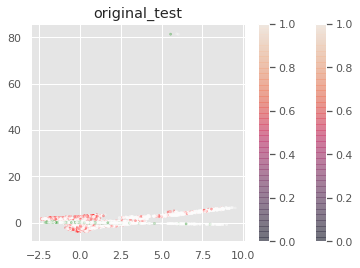

------------------------------


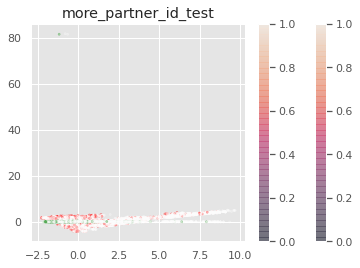

------------------------------


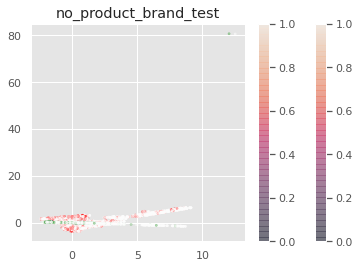

------------------------------


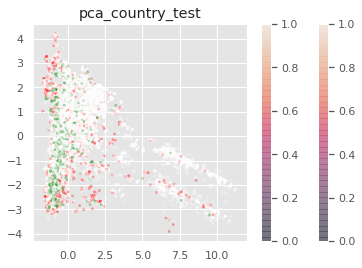

------------------------------


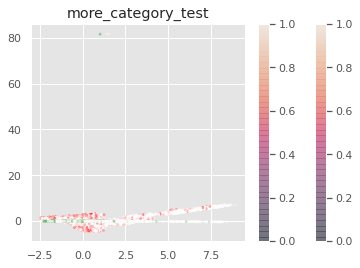

------------------------------


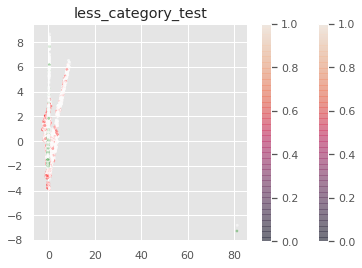

------------------------------


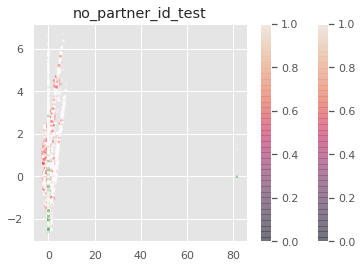

------------------------------


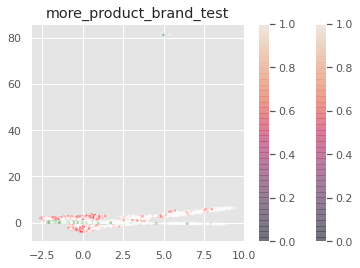

------------------------------


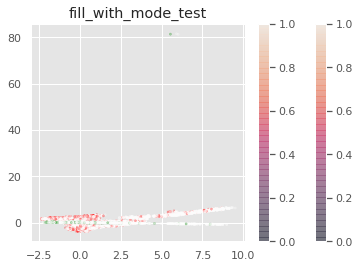

------------------------------


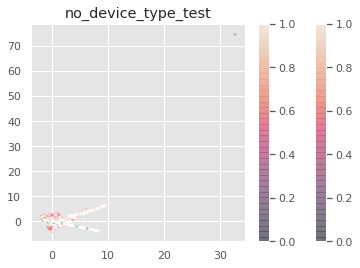

------------------------------


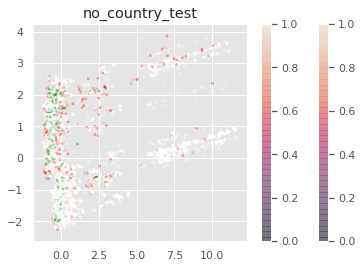

------------------------------


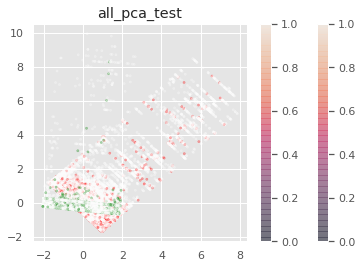

------------------------------


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
def plot(title: str, data, labels, model, flush):
  m = model(2)
  out = m.fit_transform(np.array(data.values.tolist()))
  plt.scatter(out[:, 0], out[:, 1], c=labels, alpha=0.3, s=5)
  plt.colorbar();
  plt.title(title)
  if flush:
    plt.show()

def pca_transform_numpy(data, n, name, append_to):
  pca = PCA(n_components=n)
  pca.fit(data)
  arr_pca = pca.transform(data)
  for i in range(n):
    append_to[f'{name}({i})'] = arr_pca[:,i]

for key in all_data:
  data = all_data[key].copy()
  # data['Sale'] = data['Sale'].replace(1, 'red').replace(0, 'blue')
  X_train, y_train, X_test, y_test, _, __ = get_train_test(data)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  y_train = np.where(y_train==1, 'red', 'white')
  y_test = np.where(y_test==1, 'green', 'white')
  pca_train = pd.DataFrame()
  pca_transform_numpy(X_train, 2, 'name', pca_train)
  pca_test = pd.DataFrame()
  pca_transform_numpy(X_test, 2, 'name', pca_test)
  plot(key + '_train', pca_train, y_train, PCA, False)
  plot(key + '_test', pca_test, y_test, PCA, True)
  print('-'*30)

# Models

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB, MultinomialNB,ComplementNB, CategoricalNB, BernoulliNB


In [ ]:


models = [
          # (
          #     Perceptron,
          #     'original',
          #     {
          #         'penalty': ['l1', 'l2', 'elasticnet'],
          #         'alpha': [0.01, 0.001, 0.0001, 0.00001],
          #         'random_state': [43],
          #     }
          # ),
          # (
          #     DecisionTreeClassifier,
          #     'more_category',
          #     {
          #         'criterion': ['gini', 'entropy'],
          #         'splitter': ['best', 'random'],
          #         'random_state': [43],
          #     }
          # ),
          # (
          #     BernoulliNB,
          #   'more_partner_id',
          #     {
          #         'alpha': [0.0, 0.01, 0.001, 0.1, 1, 0.5, 2, 3, 1.5],
          #         'fit_prior': [False, True],
          #     }
          # ),
          # (
          #     BaggingClassifier,
          #  'pca_country',
          #     {
          #         'n_estimators': [5, 10, 15, 20],
          #         'bootstrap': [True, False],
          #         'random_state': [43],
          #     }
          # ),
          # (
          #     QuadraticDiscriminantAnalysis,
          #  'pca_country',
          #     {
          #         'reg_param': [0.0, 0.5, 0.1],
          #         'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001]
          #     }
          # ),
          # (
          #     NearestCentroid,
          #  'more_partner_id',
          #     {
          #         'metric': ['correlation', 'dice', 'hamming', 'jaccard', 'sokalmichener', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'],
          #     }
          # ),
          (
              KNeighborsClassifier,
            'all_pca',
              {
                  'weights': ['uniform', 'distance'],
                  'n_neighbors': [10, 20, 50, 100],
                  '__add': [0, 1, 5, 10, 20, 50, 100],
                  # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  # 'leaf_size': [10, 30, 50, 100],
                  # 'p': [1, 2]
              }
          ),
          # (
          #     PassiveAggressiveClassifier,
          #  'more_partner_id',
          #     {
          #         'C': [0.1, 0.5, 1.0, 1.5, 2],
          #         'max_iter': [10, 100, 1000, 10000],
          #         'tol': [0.1, 0.001, 0.0001, 0.00001, 0.000001],
          #         'n_iter_no_change': [1, 5, 10, 15, 20, 100],
          #         'random_state': [43],
          #     }
          # ),
          # (
          #     ExtraTreeClassifier,
          #  'original',
          #     {
          #         'criterion': ['gini', 'entropy'],
          #         'splitter': ['best', 'random'],
          #         'max_depth': [None, 3, 10, 15, 20],
          #         'random_state': [43],
          #     }
          # ),
          # (
          #     RandomForestClassifier,
          #  'no_product_brand',
          #     {
          #         'n_estimators': [10, 50, 100, 1000],
          #         'criterion': ['gini', 'entropy'],
          #         'max_depth': [None, 3, 10, 15, 20],
          #         'random_state': [43],
          #     }
          # ),

]


def get_params(i, keys, param_grid, current):
  pr = []
  if i == len(keys):
    return [
            {keys[j]:current[j] for j in range(len(keys))}
    ]
  for value in param_grid[keys[i]]:
    current.append(value)
    pr += get_params(i+1, keys, param_grid, current)
    current.pop()
  return pr

# for datakey in all_data.keys():
#   if datakey != 'all_pca':
#     all_pca = pd.DataFrame()
#     pca_transform(all_data[datakey], 2, 'feature', all_pca)
#     all_pca['Sale'] = all_data[datakey]['Sale'].to_numpy()
#     all_data['all_pca'] = all_pca
for model_cls, data_name, param_grid in models:
  params = get_params(0, list(param_grid), param_grid, [])
  for param in params:
    __add = 0
    for key in param.copy():
      if key == "__add":
        __add = param.pop(key)
    X_train, y_train, X_test, y_test, X_val, y_val = get_train_test(all_data[data_name])
    cp_y_train = y_train.copy()
    cp_X_train = X_train.copy()
    for i in range(__add):
      y_train = np.append(y_train, cp_y_train[np.all([cp_y_train == 1], axis=0)], 0)
      X_train = np.append(X_train, cp_X_train[np.all([cp_y_train == 1], axis=0)], 0)
    estimator = model_cls(**param)
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_val)
    f1 = f1_score(pred, y_val)
    recall = recall_score(pred, y_val)
    acc = accuracy_score(pred, y_val)
    print(datakey, pred.sum(), model_cls.__name__,"{:.3f}".format(f1), "{:.3f}".format(recall), "{:.3f}".format(acc), param, __add, sep=";")
    # break

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = get_train_test(all_data['original'])

# np.append(y_train,, 0).shape
y_train[np.all([y_train == 1], axis=0)].shape
X_train[np.all([y_train == 1], axis=0)].shape
y_test.copy()

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.neural_network import MLPClassifier
models = [
          ('original', lambda :Perceptron(penalty='l1', alpha=0.01, random_state=43)),
          ('more_category', lambda: DecisionTreeClassifier(criterion='gini', splitter='best', random_state=43)),
          ('more_partner_id', lambda:  BernoulliNB(fit_prior=False,)),
          ('pca_country', lambda: BaggingClassifier(n_estimators=20, bootstrap=True, random_state=43)),
          ('original', lambda: QuadraticDiscriminantAnalysis()),
          ('more_partner_id', lambda: NearestCentroid(metric='manhattan')),
          ('less_category', lambda: KNeighborsClassifier()),
          ('more_partner_id', lambda: PassiveAggressiveClassifier(random_state=43)),
          ('original', lambda: ExtraTreeClassifier(criterion='entropy', splitter='random', max_depth=15, random_state=43)),
          ('no_product_brand', lambda: RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=15, random_state=43)),
          # ('original', lambda: MLPClassifier(alpha=1e-3, hidden_layer_sizes=(10, 2), random_state=43) ),
]

results = []
  
for data_name, model_cls in models:
  data_name = 'original' # TODO
  data = all_data[data_name]
  X_train, y_train, X_test, y_test, X_val, y_val = get_train_test(data)
  model = model_cls()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print(pred.sum())
  print(data_name, type(model).__name__.ljust(15), "{:.3f}".format(f1_score(pred, y_test)).ljust(5), "{:.3f}".format(recall_score(pred, y_test)))
  results.append((f1_score(pred, y_test), recall_score(pred, y_test), pred, key))

In [ ]:
_y_test  = y_test[:len(y_test)//10]
_y_test  = y_test

In [ ]:

def get_best(results, c, b, T):
  best = 0, 0
  for mask in tqdm(range(T**len(results))):
    _mask = mask
    w = []
    for i in range(len(results)):
      w.append(mask%T)
      mask //= T
    p = np.zeros(results[0][2].shape)
    cnt = 0
    for i in range(len(results)):
      # if ((1<<i) & mask):
      #   cnt += 1
      p += results[i][2] * w[i]
    pred = (p > c*sum(w) + b)
    pred = pred[:len(_y_test)]
    f1 = f1_score(pred, _y_test)
    if best[0] < f1: 
      best = f1, _mask
    # print(mask, f1, recall_score(pred, y_test))
  return best 


In [ ]:
def calulcate(rng, T):
  sr = []
  i = -rng
  while i < rng+1:
    i += 1
    j = 0
    while j < 1:
      sr.append((i, j, get_best(results, j, i, T)))
      print(i, "{:.1f}".format(j), sr[-1][-1])
      j += 0.2
  sr = list(sorted(sr, key= lambda x: x[-1][0], reverse=True))
  print('i', 'j', 'f1', 'mask')
  for i, j, f1_mask in sr:
    print(i, "{:.1f}".format(j), "{:.3f}".format(f1_mask[0]), f1_mask[1])
  return sr
calulcate(5, 2)
None

In [ ]:
def get_models(mask, T):
  w = []
  for i in range(len(results)):
    w.append(mask%T)
    mask //= T
  return w
masks = [
         883,
         819,
         51,
         50,
         895,
         511,
         1023,
]
for mask in masks:
  print(str(mask).ljust(4), get_models(mask, 2))

In [ ]:
masks = [
2014,
1771,
1042,
313,
1457,
1093,
2186,
]
for mask in masks:
  print(str(mask).ljust(4), get_models(mask, 3))

In [ ]:
results.pop(-3)

In [ ]:
get_models(3806, 4)

# other

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

metrics = ['correlation', 'dice', 'hamming', 'jaccard', 'sokalmichener', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
shrinks =np.array(range(0, 5))/10
# shrinks[0] = None
maxScore = 0
for shrink in shrinks:
  for m in metrics:
    model = NearestCentroid(metric=m, shrink_threshold=shrink)
    model.fit(X_train, y_train)
    # print(np.isnan(X_test[:,1:]).sum())
    # print(X_test.max())
    pred = model.predict(X_test)
    modelScore = f1_score(pred, y_test)
    print(m.ljust(15), str(shrink).ljust(5), "{:.3f}".format(f1_score(pred, y_test)).ljust(5), "{:.3f}".format(recall_score(pred, y_test)))
    if modelScore > maxScore:
      maxScore = modelScore
      NCMetric = m
      NCShrink = shrink
  

correlation     0.0   0.291 0.182
dice            0.0   0.000 0.000
hamming         0.0   0.000 0.000
jaccard         0.0   0.000 0.000
sokalmichener   0.0   0.000 0.000
cosine          0.0   0.291 0.182
euclidean       0.0   0.283 0.183
l1              0.0   0.292 0.185
l2              0.0   0.283 0.183
manhattan       0.0   0.279 0.183
correlation     0.1   0.292 0.182
dice            0.1   0.000 0.000
hamming         0.1   0.000 0.000
jaccard         0.1   0.000 0.000
sokalmichener   0.1   0.000 0.000
cosine          0.1   0.291 0.182
euclidean       0.1   0.284 0.183
l1              0.1   0.291 0.185
l2              0.1   0.284 0.183
manhattan       0.1   0.279 0.183
correlation     0.2   0.292 0.182
dice            0.2   0.000 0.000
hamming         0.2   0.000 0.000
jaccard         0.2   0.000 0.000
sokalmichener   0.2   0.000 0.000
cosine          0.2   0.291 0.182
euclidean       0.2   0.284 0.183
l1              0.2   0.291 0.185
l2              0.2   0.284 0.183
manhattan     

In [ ]:
X_train2 = X_train.copy()
y_train2 = y_train.copy()
for i in range(5):
    X_train2 = np.append(X_train2, X_train[y_train == 1], 0)
    y_train2 = np.append(y_train2, y_train[y_train == 1], 0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier

parameters = {'n_estimators':[100,200], 'max_depth': [10, 15], 'shuffle':[True]}
xgb_model = XGBClassifier(parameters, verbosity=3)
model = GridSearchCV(xgb_model, parameters, n_jobs=-1)
model.fit(X_train2, y_train2, verbose=3)

In [ ]:
print('best_parameters for the NN model:', model.best_params_)
pred = xgb_model.predict(X_test)
f1_score(pred, y_test)

AttributeError: ignored

In [ ]:
from torch.nn.modules.activation import Sigmoid
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

class Dataset(object):
    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])


class DatasetCriteo(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        data = torch.tensor(self.X[idx,], dtype=torch.float32)

        return data, self.y[idx]

class MLP_Criteo(nn.Module):
    def __init__(self):
        super().__init__()
        listLayers = [
            nn.Linear(41, 64),
            nn.BatchNorm1d(64),
            nn.ReLU()]
        for i in range(7):
            listLayers.append(nn.Linear(64, 64))
            listLayers.append(nn.BatchNorm1d(64))
            listLayers.append(nn.ReLU())
        listLayers.append(nn.Linear(64, 10))
        listLayers.append(nn.BatchNorm1d(10))
        listLayers.append(nn.ReLU())
        listLayers.append(nn.Linear(10, 1))
        listLayers.append(nn.Sigmoid())
        self.layers = nn.Sequential(
            *listLayers
        )       
    def forward(self, x):
        x = self.layers(x)
        return x


In [ ]:
train_dataset = DatasetCriteo(X=X_train2, y=y_train2)
valid_dataset = DatasetCriteo(X=X_val, y=y_val)

train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=256, shuffle=False)

dataiter = iter(train_loader)
datas, labels = dataiter.next()

print('images shape on PyTroch : ', datas.size())
print('labels shape on PyTroch : ', labels.size())

images shape on PyTroch :  torch.Size([256, 41])
labels shape on PyTroch :  torch.Size([256])


In [ ]:
model2 = MLP_Criteo()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model2 = model2.to(device)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1, momentum=0.8)
loss_fn = nn.BCELoss()
mean_train_losses = []
mean_valid_losses = []
mean_valid_fScores = []
mean_train_fScores = []
valid_acc_list = []
epochs = 100

for epoch in range(epochs):
    model2.train()

    train_losses = []
    valid_losses = []
    train_fScores = []
    valid_fScores = []
    for i, (datas, labels) in enumerate(train_loader):
        datas, labels = datas.to(device), labels.to(device)
        outputs = model2(datas)
        loss = loss_fn(outputs.to(torch.float32), labels.unsqueeze(1).to(torch.float32))
        predicted = torch.round(outputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        fScore = f1_score(predicted.detach().numpy(), labels)
        train_fScores.append(fScore)

    model2.eval()

    with torch.no_grad():
        for i, (datas, labels) in enumerate(valid_loader):
            datas, labels = datas.to(device), labels.to(device)
            outputs = model2(datas)
            loss = loss_fn(outputs.to(torch.float32), labels.unsqueeze(1).to(torch.float32))
            valid_losses.append(loss.item())
            predicted = torch.round(outputs)
            valid_fScores.append(f1_score(predicted.detach().numpy(), labels))
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))

    print(
                'epoch : {}, train loss : {:.4f}, train f1score : {:.4f}' \
                .format(epoch + 1, np.mean(train_losses), np.mean(train_fScores)))

epoch : 1, train loss : 0.6401, train f1score : 0.5511
epoch : 2, train loss : 0.6292, train f1score : 0.5817
epoch : 3, train loss : 0.6257, train f1score : 0.5901
epoch : 4, train loss : 0.6221, train f1score : 0.5968
epoch : 5, train loss : 0.6204, train f1score : 0.5991
epoch : 6, train loss : 0.6186, train f1score : 0.5978
epoch : 7, train loss : 0.6166, train f1score : 0.6020
epoch : 8, train loss : 0.6150, train f1score : 0.6050
epoch : 9, train loss : 0.6137, train f1score : 0.6057
epoch : 10, train loss : 0.6123, train f1score : 0.6059
epoch : 11, train loss : 0.6113, train f1score : 0.6082
epoch : 12, train loss : 0.6100, train f1score : 0.6107
epoch : 13, train loss : 0.6088, train f1score : 0.6091
epoch : 14, train loss : 0.6078, train f1score : 0.6091
epoch : 15, train loss : 0.6068, train f1score : 0.6121
epoch : 16, train loss : 0.6053, train f1score : 0.6106
epoch : 17, train loss : 0.6047, train f1score : 0.6125
epoch : 18, train loss : 0.6029, train f1score : 0.6153
e

In [ ]:
model2.eval()

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
with torch.no_grad():
    preds = model2(X_test_tensor)
    predicted = torch.round(preds)
    print(f'Test fScore: {f1_score(predicted, y_test):.4f}')

Test fScore: 0.3874


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import tensorflow
from tensorflow.keras import optimizers
import keras.backend as K 

def f1Score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


def nnmodel():
    model = Sequential()
    model.add(Dense(64, input_shape = (X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dense(64,Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(64, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(64, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(64, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(128,Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(128, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(128, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(128, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(128, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(64, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(64, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(64, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(10, Activation('relu')))
    model.add(BatchNormalization())
    model.add(Dense(1, Activation('sigmoid')))
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(),
                optimizer=optimizer,
                metrics=[f1Score])
    return model

model = nnmodel()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 64)                2688      
                                                                 
 batch_normalization_68 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_75 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_69 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_76 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_70 (Bat  (None, 64)              

In [ ]:
history = model.fit(
    X_train2, 
    y_train2,
    batch_size = 256,
    epochs=100,
)

Epoch 1/100
526/526 [==============================] - 39s 16ms/step - loss: 0.6570 - f1Score: 0.6015
Epoch 2/100
526/526 [==============================] - 8s 16ms/step - loss: 0.6398 - f1Score: 0.6396
Epoch 3/100
526/526 [==============================] - 9s 18ms/step - loss: 0.6345 - f1Score: 0.6456
Epoch 4/100
526/526 [==============================] - 8s 16ms/step - loss: 0.6317 - f1Score: 0.6506
Epoch 5/100
526/526 [==============================] - 8s 16ms/step - loss: 0.6298 - f1Score: 0.6477
Epoch 6/100
526/526 [==============================] - 8s 16ms/step - loss: 0.6282 - f1Score: 0.6522
Epoch 7/100
526/526 [==============================] - 8s 16ms/step - loss: 0.6262 - f1Score: 0.6559
Epoch 8/100
526/526 [==============================] - 8s 16ms/step - loss: 0.6253 - f1Score: 0.6552
Epoch 9/100
526/526 [==============================] - 8s 16ms/step - loss: 0.6243 - f1Score: 0.6546
Epoch 10/100
526/526 [==============================] - 8s 16ms/step - loss: 0.6219 - f1Sc

In [ ]:
predicted = model.predict(X_test)
predicted[predicted > 0.6] = 1
predicted[predicted <= 0.6] = 0
f1_score(y_test, predicted)

0.405925925925926

# MLFLOW

In [ ]:
!pip install mlflow
!pip install pyngrok --quiet

     |████████████████████████████████| 15.6 MB 9.0 MB/s 
     |████████████████████████████████| 180 kB 73.2 MB/s 
     |████████████████████████████████| 596 kB 41.4 MB/s 
     |████████████████████████████████| 58 kB 3.9 MB/s 
     |████████████████████████████████| 79 kB 10.0 MB/s 
     |████████████████████████████████| 146 kB 73.7 MB/s 
     |████████████████████████████████| 210 kB 71.5 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 75 kB 4.7 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.16.4-py3-none-any.whl size=106877 sha256=5691460fa6eb9d376740ef297286d885266d7d0f0b270b1cc63d84f2ee153d3c
  Stored in directory: /root/.cache/pip/wheels/a2/a1/6d/fa1d22ea25ed8593887437fe1c7e00f6ef307fc240ccd4dc5c
Successfully built databricks-cli
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successf

## SETUP ngork

In [ ]:
from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
# NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
NGROK_AUTH_TOKEN = "24mW3jNAdOJGZ3AXPY0AVU0RNqj_2WVx5HBH1Jz8QDHwtDnsB"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

ngrok_tunnel = ngrok.connect(addr="1234", proto="http", bind_tls=True)
print("MLflow data model:", ngrok_tunnel.public_url)

ngrok_tunnel = ngrok.connect(addr="1235", proto="http", bind_tls=True)
print("MLflow model:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://ce34-35-230-98-166.ngrok.io
MLflow data model: https://855c-35-230-98-166.ngrok.io
MLflow model: https://c1f5-35-230-98-166.ngrok.io


In [ ]:
!ps aux | grep "mlflow"

root        1135  0.0  0.0  39196  6576 ?        S    14:27   0:00 /bin/bash -c ps aux | grep "mlflow"
root        1137  0.0  0.0  38572  4948 ?        S    14:27   0:00 grep mlflow


In [ ]:
# !mlflow ui &
get_ipython().system_raw("mlflow ui --port 5000 &")

In [ ]:
%%writefile pre.py
import mlflow.pyfunc
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
from random import randint
import logging
import os

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

warnings.filterwarnings("ignore")

class AddN(mlflow.pyfunc.PythonModel):
    def __init__(self, n):
        self.n = n

    def predict(self, context, model_input):
        return model_input.apply(lambda column: column + self.n)
  
with mlflow.start_run() as run:
  # Construct and save the model
  model_path = "add_n_model"
  add5_model = AddN(n=5)
  model_path = os.path.join('models', run.info.run_id)
  mlflow.pyfunc.save_model(path=model_path, python_model=add5_model)
  
  print(os.path.join(os.getcwd(), "models", run.info.run_id))

  # Load the model in `python_function` format
  loaded_model = mlflow.pyfunc.load_model(model_path)

  # Evaluate the model
  model_input = pd.DataFrame([range(10)])
  model_output = loaded_model.predict(model_input)
  assert model_output.equals(pd.DataFrame([range(5, 15)]))
  # tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

  # # Model registry does not work with file store
  # if tracking_url_type_store != "file":
  #     # Register the model
  #     # There are other ways to use the Model Registry, which depends on the use case,
  #     # please refer to the doc for more information:
  #     # https://mlflow.org/docs/latest/model-registry.html#api-workflow
  #     mlflow.pyfunc.log_model(add5_model, "model", registered_model_name="Pre")
  # else:
  #     mlflow.pyfunc.log_model(add5_model, "model")


Overwriting pre.py


In [ ]:
!python3 pre.py

/content/models/0a3e2f16ac5d482eb6c8189d590cb1ec


In [ ]:
!ls /content/models/37518e3905fd42deb473e6bf8e89ae21

conda.yaml  MLmodel  python_model.pkl  requirements.txt


In [ ]:
!mlflow models serve -m "/content/models/0a3e2f16ac5d482eb6c8189d590cb1ec"  --no-conda -p 1234
# get_ipython().system_raw('!mlflow models serve -m "/content/models/37518e3905fd42deb473e6bf8e89ae21"  --no-conda -p 1234 &')

2022/02/07 14:26:42 INFO mlflow.models.cli: Selected backend for flavor 'python_function'
2022/02/07 14:26:42 INFO mlflow.pyfunc.backend: === Running command 'gunicorn --timeout=60 -b 127.0.0.1:1234 -w 1 ${GUNICORN_CMD_ARGS} -- mlflow.pyfunc.scoring_server.wsgi:app'
[2022-02-07 14:26:42 +0000] [1119] [INFO] Starting gunicorn 20.1.0
[2022-02-07 14:26:42 +0000] [1119] [INFO] Listening at: http://127.0.0.1:1234 (1119)
[2022-02-07 14:26:42 +0000] [1119] [INFO] Using worker: sync
[2022-02-07 14:26:42 +0000] [1122] [INFO] Booting worker with pid: 1122
[2022-02-07 14:27:54 +0000] [1119] [INFO] Handling signal: int

Aborted!
[2022-02-07 14:27:54 +0000] [1122] [INFO] Worker exiting (pid: 1122)
[2022-02-07 14:27:54 +0000] [1119] [INFO] Shutting down: Master


In [ ]:
!curl https://5287-35-230-98-166.ngrok.io/invocations -H 'Content-Type: application/json' -d '{"columns": ["a", "b", "c"],"data": [[1, 2, 3], [4, 5, 6]}'

t=2022-02-07T14:16:13+0000 lvl=warn msg="failed to open private leg" id=4793ef0ed955 privaddr=localhost:1234 err="dial tcp 127.0.0.1:1234: connect: connection refused"



<!doctype html5>
<html>
    <head>
        <style type="text/css">
         
        strong { font-weight: bold; }
        hr { -moz-box-sizing: content-box; box-sizing: content-box; height: 0; }
        html { font-family: sans-serif;   -ms-text-size-adjust: 100%;   -webkit-text-size-adjust: 100%;   } body { margin: 0; }
        a { background-color: transparent; }
        a:active, a:hover { outline: 0; }
        </style>

        <style type="text/css">
            body { background-color: #f5f5f5; }
            .container { width: 500px; margin: auto; color: #444; padding: 5px; }
            a, strong { color: purple; text-decoration: none; }
            a:hover { text-decoration: underline; }
            h2 { text-align: center; color: #000; }
            p { line-height: 20px; }
        </style>
    </head>
    <body>
        <div class="container">
            
            
<h2>Failed to complete tunnel connection</h2>
<hr />
<p>
    The connection to <strong><a href="https://5